In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Logistic Regression Model**

Accuracy with selected features: 0.87


Matthew's Correlation Coefficient (MCC): 0.81


F1 Score: 0.87


Precision Score: 0.87


Recall: 0.87


Selected Features: ['self_esteem', 'blood_pressure', 'basic_needs', 'social_support', 'extracurricular_activities']


Confusion Matrix:
[[65  4  7]
 [ 4 64  5]
 [ 3  5 63]]


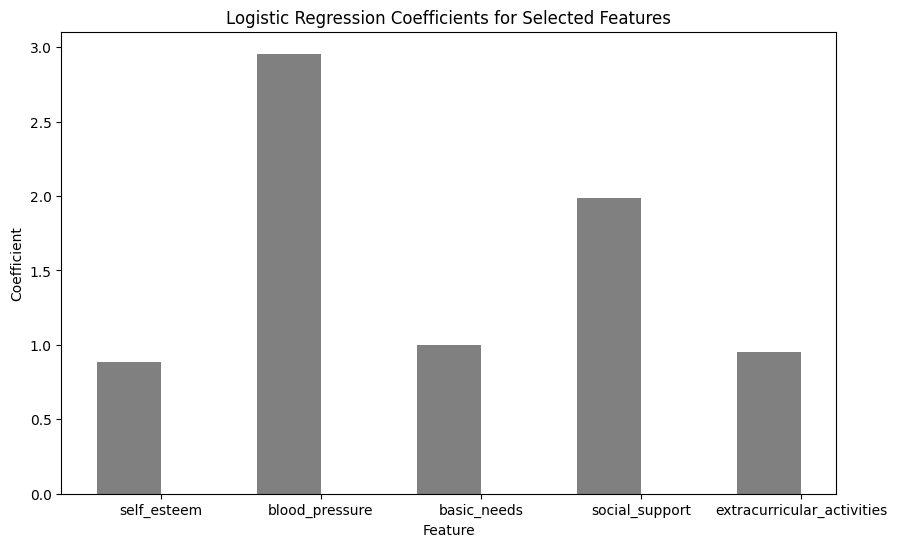

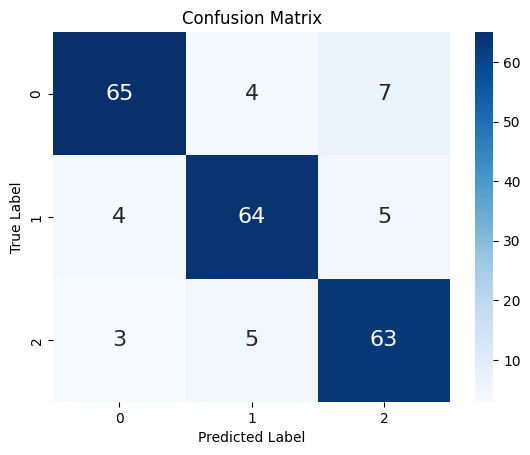

In [ ]:
#All necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

#Reading in the data
df = pd.read_csv('/content/drive/MyDrive/StressLevelDataset.csv')

#Target variable
X = df.drop('stress_level', axis=1)
y = df['stress_level']

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Creating the logistic regression model
lrm = LogisticRegression(max_iter=1000, multi_class='ovr')

#RFE fitting
target_feature_count = 5
rfe = RFE(estimator=lrm, n_features_to_select=target_feature_count)
lrm_training_rfe = rfe.fit_transform(X_train_scaled, y_train)

#Training the logistic regression model on the selected features
lrm.fit(lrm_training_rfe, y_train)

#Extracting the feature importance
coefficients = lrm.coef_[0]
feature_importance = abs(coefficients)
selected_features = X.columns[rfe.support_].tolist()

#Generating predictions
X_test_rfe = rfe.transform(X_test_scaled)
y_pred = lrm.predict(X_test_rfe)
#print(y_pred)

#Evaluation of accuracy and selected features
lrm_accuracy = accuracy_score(y_test, y_pred)
lrm_mcc = matthews_corrcoef(y_test, y_pred)
lrm_f1 = f1_score(y_test, y_pred, average='weighted')
lrm_precision = precision_score(y_test, y_pred, average='weighted')
lrm_recall = recall_score(y_test, y_pred, average='weighted')
print(f'Accuracy with selected features: {lrm_accuracy:.2f}')
print('\n')
print(f'Matthew\'s Correlation Coefficient (MCC): {lrm_mcc:.2f}')
print('\n')
print(f'F1 Score: {lrm_f1:.2f}')
print('\n')
print(f'Precision Score: {lrm_precision:.2f}')
print('\n')
print(f'Recall: {lrm_recall:.2f}')
print('\n')
selected_features = X.columns[rfe.support_]
print(f'Selected Features: {selected_features.tolist()}')
print('\n')

#Plot of all feature importances
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(10, 6))
bar_positions = range(len(selected_features))
bar_width = 0.4
plt.bar(selected_features, feature_importance, color='grey', width=bar_width, label='Coefficients')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], selected_features)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Logistic Regression Coefficients for Selected Features')
plt.show()
print('\n')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **Random Forest**


   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

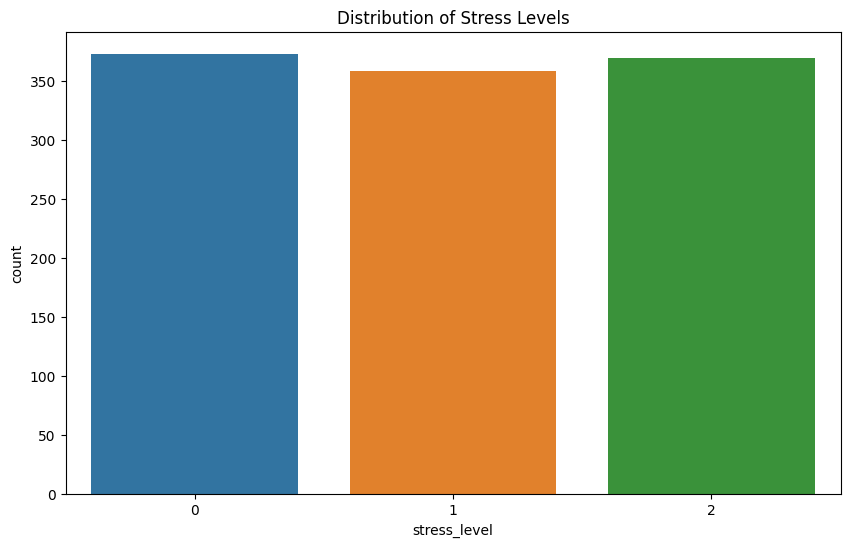

-------------------------------

Accuracy: 0.87


Matthew's Correlation Coefficient (MCC): 0.81


F1 Score: 0.87


Precision Score: 0.87


Recall: 0.87

-------------------------------


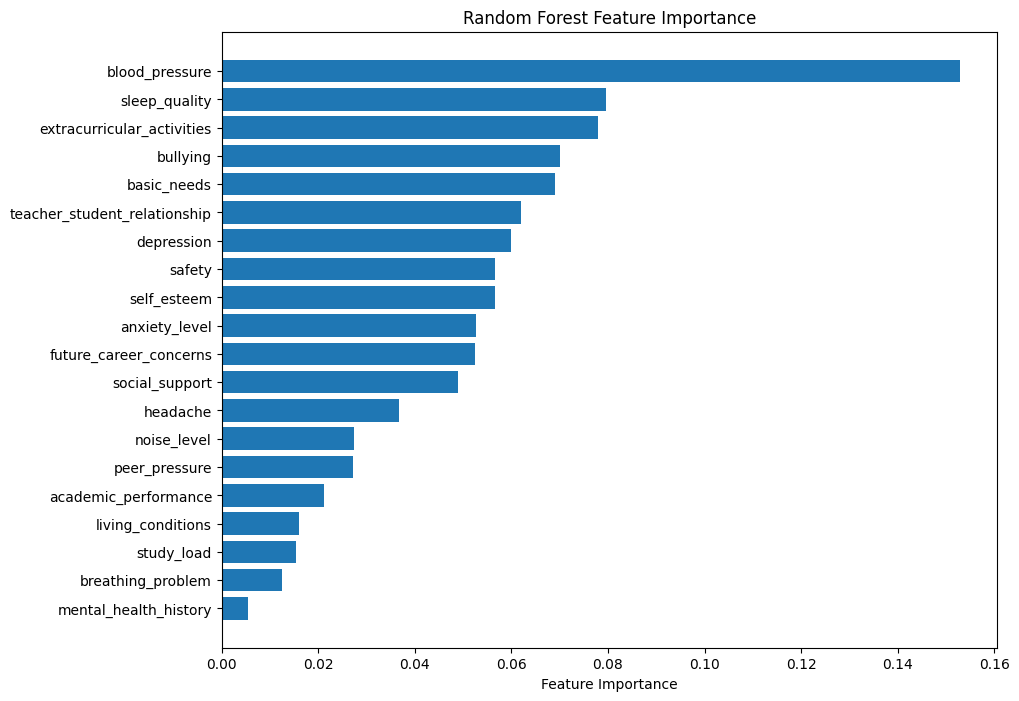



Confusion Matrix:
[[68  4  4]
 [ 6 63  4]
 [ 7  3 61]]




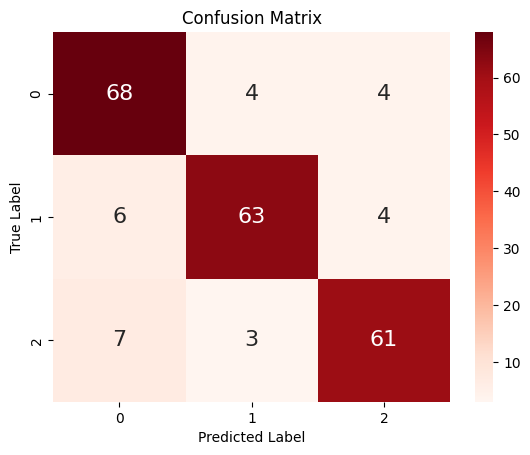

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

#Reading in data
df = pd.read_csv("/content/drive/MyDrive/StressLevelDataset.csv")
# print("Sample of the dataset:")
print(df.head())

#Plot of stress level distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='stress_level', data=df)
plt.title('Distribution of Stress Levels')
plt.show()
print("-------------------------------\n")

X = df.drop('stress_level', axis=1)
y = df['stress_level']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)
predictions = random_forest_classifier.predict(X_test)
# base_model_predictions = predictions
# np.save('/content/drive/MyDrive/Colab Notebooks/rf_predictions.npy', base_model_predictions)
rf_accuracy = accuracy_score(y_test, predictions)
rf_mcc = matthews_corrcoef(y_test, predictions)
rf_f1 = f1_score(y_test, predictions, average='weighted')
rf_precision = precision_score(y_test, predictions, average='weighted')
rf_recall = recall_score(y_test, predictions, average='weighted')
print(f"Accuracy: {rf_accuracy:.2f}")
print('\n')
print(f'Matthew\'s Correlation Coefficient (MCC): {rf_mcc:.2f}')
print('\n')
print(f'F1 Score: {rf_f1:.2f}')
print('\n')
print(f'Precision Score: {rf_precision:.2f}')
print('\n')
print(f'Recall: {rf_recall:.2f}')
print("\n-------------------------------")

#Visualization of feature importance
feature_importance = random_forest_classifier.feature_importances_
feature_names = X.columns
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()
print('\n')

conf_matrix = confusion_matrix(y_test, predictions)
print('Confusion Matrix:')
print(conf_matrix)

print('\n')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **Naive Bayes Classifier**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
path ="/content/drive/MyDrive/StressLevelDataset.csv"
df=pd.read_csv(path)
# missing_values = df.isnull().sum()
# print("\nMissing Values:")
# print(missing_values)

target_column = 'stress_level'
correlation_matrix = df.corr()
target_correlations = correlation_matrix[target_column].abs()
highly_correlated_features_target = target_correlations[target_correlations > 0.7].index
highly_correlated_features = set()
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[correlation_matrix[col] > 0.7].tolist()
    highly_correlated_features.update(correlated_cols)
features_to_remove = list(highly_correlated_features - set(highly_correlated_features_target))
df_filtered = df.drop(columns=features_to_remove)
print("DataFrame after removing highly correlated features:")
print(df_filtered)

print("Remaining Features:")
print(df_filtered.columns)

output_file_path = '/content/drive/MyDrive/StressLevelDataset2.csv'
df_filtered.to_csv(output_file_path, index=False)
correlation_matrix_filtered = df_filtered.corr()
print(correlation_matrix_filtered)

file_path = '/content/drive/MyDrive/StressLevelDataset2.csv'
df_filtered = pd.read_csv(file_path)
target_column = 'stress_level'
X = df_filtered.drop(columns=[target_column])
y = df_filtered[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print("Training set shape:", X_train.shape, y_train.shape)
# print("Testing set shape:", X_test.shape, y_test.shape)
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
nb_pred = naive_bayes_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_mcc = matthews_corrcoef(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred, average='weighted')
nb_recall = recall_score(y_test, nb_pred, average='weighted')
nb_f1 = f1_score(y_test, nb_pred, average='weighted')
print(f'Model Accuracy on Testing Set: {nb_accuracy:.2f}')
print('\n')
print(f'Matthew\'s Correlation Coefficient (MCC): {nb_mcc:.2f}')
print('\n')
print(f'F1 Score: {nb_f1:.2f}')
print('\n')
print(f'Precision Score: {nb_precision:.2f}')
print('\n')
print(f'Recall: {nb_recall:.2f}')
print('\n')
#print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))
print('\n')
sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, fmt='d', cmap='Greens', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **K-Nearest Neighbor**

Model Accuracy on Testing Set: 0.85


Matthew's Correlation Coefficient (MCC): 0.77


F1 Score: 0.85


Precision Score: 0.92


Recall: 0.92


Confusion Matrix:
[[64  6  6]
 [ 5 63  5]
 [ 8  4 59]]




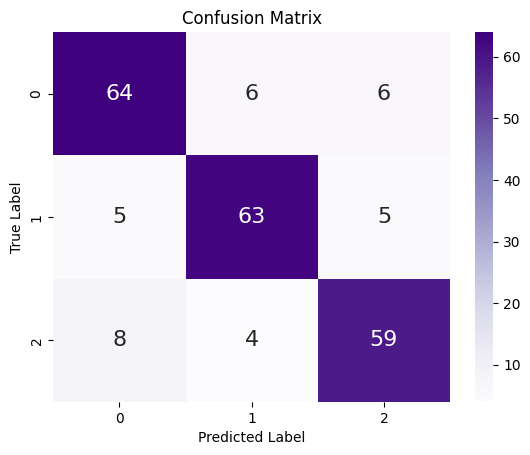

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

data = pd.read_csv("/content/drive/MyDrive/StressLevelDataset.csv")
# data.shape
# print("Dataset Info:")
# print(data.info())

X = data.drop('stress_level', axis=1)
y = data['stress_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_k = grid_search.best_params_['n_neighbors']
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train_scaled, y_train)
y_pred = best_knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_mcc = matthews_corrcoef(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred, average='weighted')
knn_precision = precision_score(y_test, nb_pred, average='weighted')
knn_recall = recall_score(y_test, nb_pred, average='weighted')
print(f'Model Accuracy on Testing Set: {knn_accuracy:.2f}')
print('\n')
print(f'Matthew\'s Correlation Coefficient (MCC): {knn_mcc:.2f}')
print('\n')
print(f'F1 Score: {knn_f1:.2f}')
print('\n')
print(f'Precision Score: {knn_precision:.2f}')
print('\n')
print(f'Recall: {knn_recall:.2f}')
print('\n')
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('\n')

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# **Stacking**

Training dataset stack model performance
Accuracy: 1.00
MCC: 1.00
F1 score: 1.00


Confusion Matrix:
[[66  5  5]
 [ 7 64  2]
 [ 5  3 63]]


Test dataset stack model performance
Accuracy: 0.88
MCC: 0.82
F1 score: 0.88


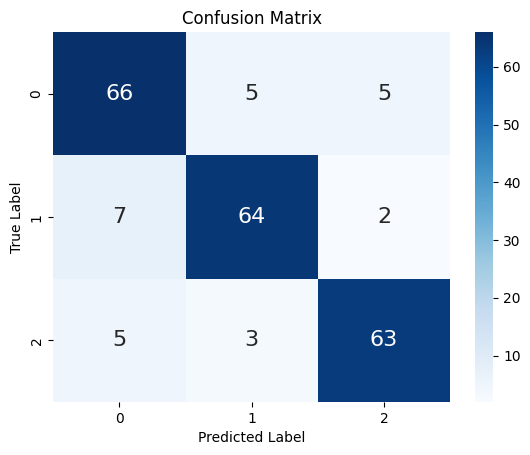

In [ ]:
#Necessary libraries
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score, confusion_matrix, precision_score, recall_score
import seaborn as sns

#List of base models
base_models = [
              ('lr', lrm),
              ('rf', random_forest_classifier),
              ('nb', naive_bayes_classifier),
              ('knn', best_knn_classifier)
              ]

#Creation and training of stacking model
stack_model = StackingClassifier(estimators = base_models, final_estimator=LogisticRegression())
stack_model.fit(X_train, y_train)

#Predictions on X_train and X_test
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

#Training dataset performance metrics of stack model
train_acc = accuracy_score(y_train, y_train_pred)
train_mcc = matthews_corrcoef(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')

#Test dataset performance metrics of stack model
test_acc = accuracy_score(y_test, y_test_pred)
test_mcc = matthews_corrcoef(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

print('Training dataset stack model performance')
print(f'Accuracy: {train_acc:.2f}')
print(f'MCC: {train_mcc:.2f}')
print(f'F1 score: {train_f1:.2f}')
print('\n')
conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('\n')
print('Test dataset stack model performance')
print(f'Accuracy: {test_acc:.2f}')
print(f'MCC: {test_mcc:.2f}')
print(f'F1 score: {test_f1:.2f}')

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **Performance Metrics**

In [ ]:
#Listing all accuracies generated by the model
from sklearn.metrics import roc_curve, auc
model_accuracies = {'lrm': lrm_accuracy,
                    'rf': rf_accuracy,
                    'nb': nb_accuracy,
                    'knn': knn_accuracy,
                    'stack': train_acc
                    }
print(f'All model accuracies including the stack model: {model_accuracies}')

mcc_train_list = {'lrm':lrm_mcc,
'rf': rf_mcc,
'nb': nb_mcc,
'knn': knn_mcc,
'stack': test_mcc}

f1_train_list = {'lrm':lrm_f1,
'rf': rf_f1,
'nb': nb_f1,
'knn': knn_f1,
'stack': test_f1}

precision_train_list = {'lrm':lrm_precision,
'rf': rf_precision,
'nb': nb_precision,
'knn': knn_precision,
'stack': test_precision}

recall_train_list = {'lrm':lrm_recall,
'rf': rf_recall,
'nb': nb_recall,
'knn': knn_recall,
'stack': test_recall}

In [ ]:
import pandas as pd

acc_df = pd.DataFrame.from_dict(model_accuracies, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
precision_df = pd.DataFrame.from_dict(precision_train_list, orient='index', columns=['Precision'])
recall_df = pd.DataFrame.from_dict(recall_train_list, orient='index', columns=['Recall'])
df = pd.concat([acc_df, mcc_df, f1_df, precision_df, recall_df], axis=1)
df.round(2)

,Accuracy,MCC,F1,Precision,Recall
lrm,0.89,0.83,0.89,0.89,0.89
rf,0.87,0.81,0.87,0.87,0.87
nb,0.92,0.88,0.92,0.92,0.92
knn,0.85,0.77,0.85,0.92,0.92
stack,1.00,0.82,0.88,0.88,0.88


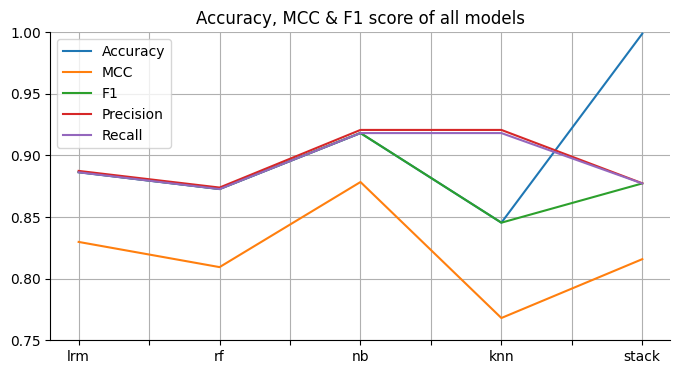

In [ ]:
from matplotlib import pyplot as plt

df['Accuracy'].plot(kind='line', figsize=(8,4), title='Accuracy, MCC & F1 score of all models')
df['MCC'].plot(kind='line', figsize=(8, 4))
df['F1'].plot(kind='line', figsize=(8, 4))
df['Precision'].plot(kind='line', figsize=(8, 4))
df['Recall'].plot(kind='line', figsize=(8, 4))
plt.grid()
plt.legend()
plt.ylim(0.75, 1)
plt.gca().spines[['top', 'right']].set_visible(False)

# **ROC and AUC curves**

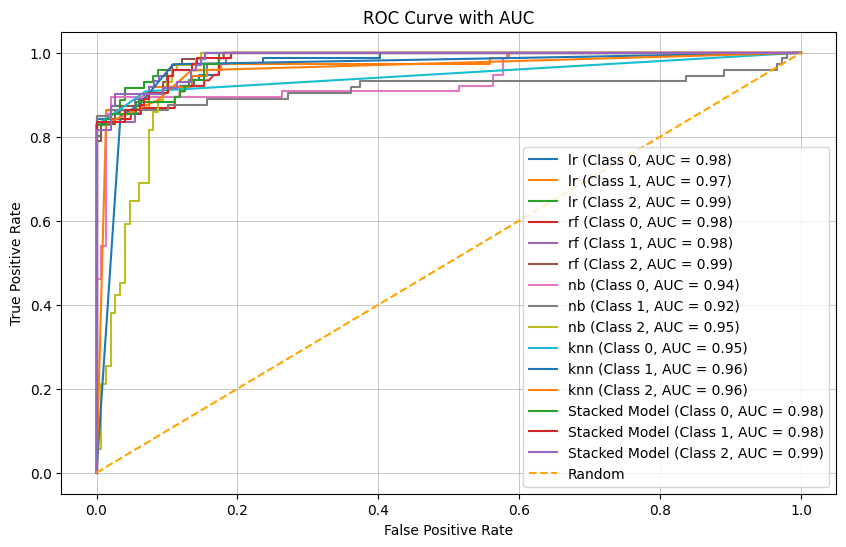

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

classifiers = []
for name, model in base_models + [('Stacked Model', stack_model)]:
    # Create a OneVsRest classifier for each base model and stacking model
    classifier = OneVsRestClassifier(model)

    # Fit the OneVsRest classifier
    classifier.fit(X_train, y_train)

    # Append the classifier to the list
    classifiers.append((name, classifier))

# Plot the ROC curves for each class
plt.figure(figsize=(15, 5))

for name, classifier in classifiers:
    # Get predicted probabilities for each class
    y_prob = classifier.predict_proba(X_test)

    # Convert y_test to a one-hot encoded format if not already
    if len(np.unique(y_test)) > 2:
        y_test_one_hot = np.eye(len(np.unique(y_test)))[y_test]
    else:
        y_test_one_hot = y_test

    # For each class, calculate ROC curve and AUC
    for i in range(y_test_one_hot.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (Class {i}, AUC = {roc_auc:.2f})')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], linestyle='dashed', color='orange', label='True Positive = False Positive')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC')
plt.legend()
plt.grid(True, which='both', linestyle='-', linewidth=0.5)

plt.show()